In [1]:
import logging

logging.basicConfig(
    filename='log/inference.log',
    filemode='w',
    level=logging.DEBUG,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

In [2]:
import requests
import time
from bs4 import BeautifulSoup

def fetch_book_info(title, retries=3, delay=2):
    """
    Fetch book information from OpenLibrary for a given title.
    
    :param title: The title of the book.
    :return: Book data if found, otherwise None.
    """
    for _ in range(retries):
        try:
            url = "https://openlibrary.org/search.json"
            params = {
                'q': title.lower(),
                'limit': 5
            }
            response = requests.get(url, params=params)
            if response.status_code == 200:
                data = response.json()
                if data['docs']:
                    ia_links = []
                    lccn_ids = []
                    for doc in data['docs']:
                        ia_links.extend(doc.get('ia', []))
                        lccn_ids.extend(doc.get('lccn', []))
                    print(lccn_ids)
                    return ia_links, lccn_ids
            return [], []
        except ConnectionError as e:
            print(f"ConnectionError: {e}. Retrying in {delay} seconds...")
            time.sleep(delay)
    print(f"Failed to retrieve data after multiple attempts {title}.")
    return [], []

def fetch_marcxml_data_congress(lccn, retries=3, delay=5):
    base_url = "https://lccn.loc.gov/"
    query = f"{lccn}/marcxml"
    url = base_url + query
    print(url)
    
    for _ in range(retries):
        try:
            response = requests.get(url)
            
            if response.status_code == 200:
                return response.text
            else:
                print(f"Error: {response.status_code}")
                return None
        except ConnectionError as e:
            print(f"ConnectionError: {e}. Retrying in {delay} seconds...")
            time.sleep(delay)
        except Exception as e:
            print(f"ConnectionError: {e}. Retrying in {delay} seconds...")
            time.sleep(delay)
    print(f"Failed to retrieve data after multiple attempts {lccn}.")
    return None

In [5]:
import json
file_path = "data/goodreads/goodreads_book_works.json"
book_data = []
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()
        if line:
            book_data.append(json.loads(line))

book_data 

[{'books_count': '1',
  'reviews_count': '6',
  'original_publication_month': '8',
  'default_description_language_code': '',
  'text_reviews_count': '1',
  'best_book_id': '5333265',
  'original_publication_year': '1984',
  'original_title': 'W. C. Fields: A Life on Film',
  'rating_dist': '5:1|4:1|3:1|2:0|1:0|total:3',
  'default_chaptering_book_id': '',
  'original_publication_day': '',
  'original_language_id': '',
  'ratings_count': '3',
  'media_type': 'book',
  'ratings_sum': '12',
  'work_id': '5400751'},
 {'books_count': '22',
  'reviews_count': '10162',
  'original_publication_month': '',
  'default_description_language_code': '',
  'text_reviews_count': '741',
  'best_book_id': '25717',
  'original_publication_year': '2001',
  'original_title': 'Good Harbor',
  'rating_dist': '5:517|4:1787|3:2763|2:966|1:196|total:6229',
  'default_chaptering_book_id': '',
  'original_publication_day': '',
  'original_language_id': '',
  'ratings_count': '6229',
  'media_type': 'book',
  'ra

In [6]:
book_data_revised = {}
for book in book_data:
    book_data_revised[book['work_id']] = {'title': book['original_title'], 'year': book['original_publication_year'], 'authors': []  , 'isbns': [], 'alt': []} 
book_data_revised

{'5400751': {'title': 'W. C. Fields: A Life on Film',
  'year': '1984',
  'authors': [],
  'isbns': [],
  'alt': []},
 '1323437': {'title': 'Good Harbor',
  'year': '2001',
  'authors': [],
  'isbns': [],
  'alt': []},
 '8948723': {'title': '',
  'year': '1987',
  'authors': [],
  'isbns': [],
  'alt': []},
 '6243154': {'title': 'Best Friends Forever',
  'year': '2009',
  'authors': [],
  'isbns': [],
  'alt': []},
 '278577': {'title': 'Runic Astrology: Starcraft and Timekeeping in the Northern Tradition',
  'year': '1990',
  'authors': [],
  'isbns': [],
  'alt': []},
 '278578': {'title': 'The Aeneid for Boys and Girls',
  'year': '1908',
  'authors': [],
  'isbns': [],
  'alt': []},
 '368291': {'title': 'The Wanting of Levine',
  'year': '',
  'authors': [],
  'isbns': [],
  'alt': []},
 '701117': {'title': "All's Fairy in Love and War (Avalon: Quest for Magic, 2)",
  'year': '2003',
  'authors': [],
  'isbns': [],
  'alt': []},
 '56135087': {'title': '', 'year': '', 'authors': [], '

In [7]:
with open(f"data/books_revised.json", 'w') as json_file:
    json.dump(book_data_revised, json_file, indent=4)

In [21]:
titles = []
for entry in book_data:
    if entry['original_title'] != "":
        titles.append(entry['original_title'])
titles

['W. C. Fields: A Life on Film',
 'Good Harbor',
 'Best Friends Forever',
 'Runic Astrology: Starcraft and Timekeeping in the Northern Tradition',
 'The Aeneid for Boys and Girls',
 'The Wanting of Levine',
 "All's Fairy in Love and War (Avalon: Quest for Magic, 2)",
 "The Devil's Notebook (LaVey, Anton)",
 'Crowner Royal',
 'Spirit Lake - Die Legende des Wendigo',
 'The Bonfire of the Vanities',
 '90 Minutes in Heaven',
 'Heaven',
 'Penny from Heaven',
 'Dog Heaven',
 'Des yeux de soie',
 'Bonjour tristesse',
 'The Tommyknockers',
 'Crude World: The Violent Twilight of Oil',
 'The Passion (Dark Visions, #3)',
 'Untold Secrets: Fire & Ice',
 'The Vision of Sir Launfal, and Other Poems: With a Biographical Sketch, Notes, Portraits, and Other Illustrations, and with Aids to the Study of The Vision of Sir Launfal, by H. A. Davidson.',
 'Stoner',
 'syr Hkhmt dr rwp',
 'Dead in the Morning',
 'Emma',
 'Moths and Mothers, Feathers and Fathers: A Story About a Tiny Owl Named Squib (Moths & Mo

In [22]:
print(len(book_data))
print(len(titles))

1521962
646906


In [5]:
start_point_idx = 0
last_processed_idx = start_point_idx # last index processed 
books_languages = []
for entry in titles[start_point_idx:]:
    logging.debug(f"Book {entry}\n")
    book = entry
    if len(entry) > 60:
        entry = entry[:60]
    book_language = {
        'title': entry,
        'original_language': [], # I made this an array in case of badly setup marcxmls
        'translations': [],
        'err': []
    }
    # get all internet archive links for that book
    _, lccn_ids = fetch_book_info(book)
    # save them in the json
    book_language['marcxml'] = lccn_ids
    logging.debug(f"Lccn_ids: {lccn_ids}\n")
    for lccn_id in lccn_ids:
        # get marcxml data if it exists
        time.sleep(6)
        marcxml_data = fetch_marcxml_data_congress(lccn_id)
            
        if marcxml_data is None:
            print(f"Book: {book} Lccn_id: {lccn_id}; no marcxml found")
            continue
        root = BeautifulSoup(marcxml_data)
        if not root.find('record'):
            logging.debug(f"Book: {book} Lccn_id: {lccn_id}; record not found")
            print(f"{lccn_id} ; RECORD IS NOT PRESENT?!??!?.")
            book_language['err'].append(lccn_id)
        datafield_041 = root.find('datafield', {'tag': '041'})
        if datafield_041 == [] or datafield_041 is None:
            print(f"Book: {book} Lccn_id: {lccn_id}; no datafield 041 found")
            continue

        subfield_orig = None
        subfield_current = None
        if datafield_041.get('ind1') == '0':
            subfield_orig = datafield_041.find('subfield', {'code': 'h'})
        elif datafield_041.get('ind1') == '1':
            subfield_current = datafield_041.find('subfield', {'code': 'a'})
            subfield_orig = datafield_041.find('subfield', {'code': 'h'})
        else:
            book_language['unexpected'] = datafield_041.text
            print(f"Datafield 041 contains unexpected files\n{datafield_041}")
            continue
        
        if subfield_orig is not None:
            book_language['original_language'].append(subfield_orig.text)
            logging.debug(f"Book: {book} ->  {subfield_orig.text}\n")
        if subfield_current is not None:
            book_language['translations'].append(subfield_current.text)
            logging.debug(f"Book: {book} ->  {subfield_current.text}\n")
        if 'eng' in book_language['original_language'] or 'eng' in book_language['translations']:
            break
    last_processed_idx += 1
    books_languages.append(book_language)

['84002052', '2004053363', '2003270656', '2006036627', '77008333', '75303781', '35013054', '08020699', '2012404723', '11009377', '66032753', '2005276601', '35011316', '49004601', '62020765', '2005296791', '21015613', '2012376483', '03028574', '2015037415', '11026444', '05034647', '58006341', 'he68000631', '65004764', '93132294', '57059594', '37022720', '32020215', 'a56007015', '70571354', '2013498170', '84015388', '73959506', '96230441', '92102347', '26000591', '05039598', '72160789', '17030271', '96161221', '2015460289', '83040539', '88036951', '94134785', '2007411465', '47004862', '17024235', '91015777', '31029859', '2007927192', '2005281862', '92190959', '94022929', '93001033', '2009280014', '76359113', '85022951', '40034497', '75098372', '95010120', '76355473', '26000602', '12038628', '87024093', '07033224', '62019021', '2010029455', '87107378', '97061986', '2002282265', '2001562169', '45013493', '57005162', '62014210', '00021237', '09007723', '12010677', '69013260', '79115321', '5

/home/rares17/.pyenv/versions/3.8.20/lib/python3.8/html/parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


Book: W. C. Fields: A Life on Film Lccn_id: 84002052; no datafield 041 found
https://lccn.loc.gov/2004053363/marcxml
Book: W. C. Fields: A Life on Film Lccn_id: 2004053363; no datafield 041 found
https://lccn.loc.gov/2003270656/marcxml
Book: W. C. Fields: A Life on Film Lccn_id: 2003270656; no datafield 041 found
https://lccn.loc.gov/2006036627/marcxml
Book: W. C. Fields: A Life on Film Lccn_id: 2006036627; no datafield 041 found
https://lccn.loc.gov/77008333/marcxml
Book: W. C. Fields: A Life on Film Lccn_id: 77008333; no datafield 041 found
https://lccn.loc.gov/75303781/marcxml
Book: W. C. Fields: A Life on Film Lccn_id: 75303781; no datafield 041 found
https://lccn.loc.gov/35013054/marcxml
Book: W. C. Fields: A Life on Film Lccn_id: 35013054; no datafield 041 found
https://lccn.loc.gov/08020699/marcxml
Book: W. C. Fields: A Life on Film Lccn_id: 08020699; no datafield 041 found
https://lccn.loc.gov/2012404723/marcxml
['2001049664', '2001055778', '79337490', '2006271039', '95100021',

KeyboardInterrupt: 

In [6]:
len(books_languages)
print(start_point_idx)
print(last_processed_idx)

0
956


In [7]:
with open(f"inference/inference_{start_point_idx}_{last_processed_idx}.json", 'w') as json_file:
    json.dump(books_languages, json_file, indent=4)

In [15]:
with open("inference/inference_0_956.json") as file:
    data = json.load(file)

In [19]:
translations_count = 0
originals_count = 0
neither_count = 0

# Classify each entry
for entry in data:
    has_eng_translation = 'eng' in entry.get('translations', [])
    has_eng_original = 'eng' in entry.get('original_language', [])

    if has_eng_translation:
        translations_count += 1
    elif has_eng_original:
        originals_count += 1
    else:
        neither_count += 1
        
categories = ['English Translated', 'English Original', 'Unknown']
counts = [translations_count, originals_count, neither_count]
print(counts)

[100, 113, 743]


In [3]:
def read_large_json_file_in_batches(file_path, batch_size=1000):
    with open(file_path, 'r') as file:
        batch = []
        for line in file:
            try:
                # Parse each line as a JSON object
                entry = json.loads(line.strip())
                batch.append(entry)
            except json.JSONDecodeError:
                print(f"Skipping malformed JSON entry: {line}")
                continue

            # Yield the batch when it reaches the specified batch size
            if len(batch) >= batch_size:
                yield batch
                batch = []  # Clear the batch for the next set of entries
        
        # Yield the final batch if it's not empty
        if batch:
            yield batch

In [1]:
import json
# with open("data/authors_revised.json") as file:
#     authors_revised = json.load(file)
with open("data/books_revised.json") as file:
    books_revised = json.load(file)
books_revised

{'5400751': {'title': 'W. C. Fields: A Life on Film',
  'year': '1984',
  'authors': [],
  'isbns': [],
  'alt': []},
 '1323437': {'title': 'Good Harbor',
  'year': '2001',
  'authors': [],
  'isbns': [],
  'alt': []},
 '8948723': {'title': '',
  'year': '1987',
  'authors': [],
  'isbns': [],
  'alt': []},
 '6243154': {'title': 'Best Friends Forever',
  'year': '2009',
  'authors': [],
  'isbns': [],
  'alt': []},
 '278577': {'title': 'Runic Astrology: Starcraft and Timekeeping in the Northern Tradition',
  'year': '1990',
  'authors': [],
  'isbns': [],
  'alt': []},
 '278578': {'title': 'The Aeneid for Boys and Girls',
  'year': '1908',
  'authors': [],
  'isbns': [],
  'alt': []},
 '368291': {'title': 'The Wanting of Levine',
  'year': '',
  'authors': [],
  'isbns': [],
  'alt': []},
 '701117': {'title': "All's Fairy in Love and War (Avalon: Quest for Magic, 2)",
  'year': '2003',
  'authors': [],
  'isbns': [],
  'alt': []},
 '56135087': {'title': '', 'year': '', 'authors': [], '

In [4]:
batches_processed = 0
file_path = "data/goodreads/goodreads_books.json"
for batch in read_large_json_file_in_batches(file_path, batch_size=1000):
    for entry in batch:
        if entry['work_id'] == '':
            continue
        for author in entry['authors']:
            books_revised[entry['work_id']]['authors'].append(author['author_id'])
        if entry['isbn'] != "":
            books_revised[entry['work_id']]['isbns'].append(entry['isbn'])
        if entry['isbn13'] != "":
            books_revised[entry['work_id']]['isbns'].append(entry['isbn13'])
        if entry['title'] != "":
            books_revised[entry['work_id']]['alt'].append(entry['title'])
        if entry['title_without_series'] != "":
            books_revised[entry['work_id']]['alt'].append(entry['title_without_series'])
    batches_processed += 1
    print(batches_processed)
            
            

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [6]:
with open(f"data/books_revised_crossed.json", 'w') as json_file:
    json.dump(books_revised, json_file, indent=4)

In [7]:
books_revised

{'5400751': {'title': 'W. C. Fields: A Life on Film',
  'year': '1984',
  'authors': ['604031'],
  'isbns': ['0312853122', '9780312853129'],
  'alt': ['W.C. Fields: A Life on Film', 'W.C. Fields: A Life on Film']},
 '1323437': {'title': 'Good Harbor',
  'year': '2001',
  'authors': ['626222',
   '626222',
   '626222',
   '626222',
   '626222',
   '626222',
   '14243700',
   '626222'],
  'isbns': ['0743509986',
   '9780743509985',
   '0330491660',
   '9780330491662',
   '0743225325',
   '9780743225328',
   '0743229762',
   '9780743229760',
   '9786005620795',
   '0743225724',
   '9780743225724'],
  'alt': ['Good Harbor',
   'Good Harbor',
   'Good Harbor',
   'Good Harbor',
   'Good Harbor',
   'Good Harbor',
   'Good Harbor: A Novel',
   'Good Harbor: A Novel',
   'Good Harbour',
   'Good Harbour',
   'گود هاربر',
   'گود هاربر',
   'Good Harbor',
   'Good Harbor']},
 '8948723': {'title': '',
  'year': '1987',
  'authors': ['10333'],
  'isbns': [],
  'alt': ['The Unschooled Wizard (Sun

In [11]:
for entry in books_revised.items():
    entry[1]['authors'] = list(set(entry[1]['authors']))
    entry[1]['isbns'] = list(set(entry[1]['isbns']))
    entry[1]['alt'] = list(set(entry[1]['alt']))
books_revised

{'5400751': {'title': 'W. C. Fields: A Life on Film',
  'year': '1984',
  'authors': ['604031'],
  'isbns': ['0312853122', '9780312853129'],
  'alt': ['W.C. Fields: A Life on Film']},
 '1323437': {'title': 'Good Harbor',
  'year': '2001',
  'authors': ['14243700', '626222'],
  'isbns': ['9786005620795',
   '9780743509985',
   '0743509986',
   '9780743229760',
   '9780743225724',
   '9780330491662',
   '0743229762',
   '0743225325',
   '0743225724',
   '0330491660',
   '9780743225328'],
  'alt': ['Good Harbour', 'Good Harbor: A Novel', 'Good Harbor', 'گود هاربر']},
 '8948723': {'title': '',
  'year': '1987',
  'authors': ['10333'],
  'isbns': [],
  'alt': ['The Unschooled Wizard (Sun Wolf and Starhawk, #1-2)']},
 '6243154': {'title': 'Best Friends Forever',
  'year': '2009',
  'authors': ['9212', '7243232', '3118853', '4561551', '3118854'],
  'isbns': ['9788856610451',
   '9781847390233',
   '9788375083637',
   '1847390234',
   '9781847370211',
   '9781439196878',
   '9781439165492',
  

In [12]:

with open(f"data/books_revised_crossed_final.json", 'w') as json_file:
    json.dump(books_revised, json_file, indent=4)

In [2]:
import json
with open("data/books_revised_crossed_final.json") as file:
    books_revised = json.load(file)
books_revised

{'5400751': {'title': 'W. C. Fields: A Life on Film',
  'year': '1984',
  'authors': ['604031'],
  'isbns': ['0312853122', '9780312853129'],
  'alt': ['W.C. Fields: A Life on Film']},
 '1323437': {'title': 'Good Harbor',
  'year': '2001',
  'authors': ['14243700', '626222'],
  'isbns': ['9786005620795',
   '9780743509985',
   '0743509986',
   '9780743229760',
   '9780743225724',
   '9780330491662',
   '0743229762',
   '0743225325',
   '0743225724',
   '0330491660',
   '9780743225328'],
  'alt': ['Good Harbour', 'Good Harbor: A Novel', 'Good Harbor', 'گود هاربر']},
 '8948723': {'title': '',
  'year': '1987',
  'authors': ['10333'],
  'isbns': [],
  'alt': ['The Unschooled Wizard (Sun Wolf and Starhawk, #1-2)']},
 '6243154': {'title': 'Best Friends Forever',
  'year': '2009',
  'authors': ['9212', '7243232', '3118853', '4561551', '3118854'],
  'isbns': ['9788856610451',
   '9781847390233',
   '9788375083637',
   '1847390234',
   '9781847370211',
   '9781439196878',
   '9781439165492',
  

In [15]:
import requests

def fetch_work_ids(isbn, retries=3, delay=30):
    for _ in range(retries):
        try:
            url = f"https://openlibrary.org/api/books?bibkeys=ISBN:{isbn}&jscmd=details&format=json"
            response = requests.get(url)

            if response.status_code == 200:
                data = response.json()
                if f"ISBN:{isbn}" in data:
                    main_dict = data[f"ISBN:{isbn}"]['details']

                    if 'works' in main_dict:
                        works = []
                        for work in main_dict['works']:
                            works.append(work['key'])
                        return works
            return []
        except ConnectionError as e:
            print(f"ConnectionError: {e}. Retrying in {delay} seconds...")
            time.sleep(delay)
    print(f"Failed to retrieve data after multiple attempts {isbn}.")
    return []

In [3]:
import xml.etree.ElementTree as ET

def fetch_isbns(isbn, retries=3, delay=60):
    for _ in range(retries):
        try:
            url = f"https://www.librarything.com/api/eb6d68ac230ae829cb51ccba912bcef9/thingISBN/{isbn}"
            response = requests.get(url)
            
            if response.status_code == 200:
                root = ET.fromstring(response.text)
                if "idlist" not in root:
                    raise ConnectionError("no idlist")
                return [isbn.text for isbn in root.findall('isbn')]
            return []
        except ConnectionError as e:
                print(f"ConnectionError: {e}. Retrying in {delay} seconds...")
                time.sleep(delay)
    print(f"Failed to retrieve data after multiple attempts {isbn}.")
    return []

In [13]:
import time
counter = 0

for book in books_revised.items():
    if counter < 2492:
        counter += 1
        continue
    entry = []
    isbns = book[1]['isbns']
    entry += isbns
    for isbn in isbns:
        entry += fetch_isbns(isbn)
        time.sleep(0.01)
    entry = list(set(entry))
    print((book[0], entry))
    works_isbns[book[0]] = entry
    counter +=1
    if counter % 100:
        print(counter)


('522049', ['9780802840868', '0802840868'])
2493
('30783', ['9781455538263', '9781455546442', '9781455538270', '1455546445', '1455538264', '9781441813817', '1441813810', '1455538272', '9780787102982', '044619154X', '0446516317', '0009796058413', '9783442355457', '3442355451', '9788498723885', '9788408027140', '0446603309', '9780340961803', '9780446516310', '0340961805', '0787102989', '1441813829', '840802714X', '8498723884', '9780446191548', '9780446603300', '9781441813824'])
2494
('21427848', [])
2495
('55569123', ['9781370838370'])
2496
('6086766', ['9789602260487', '9602260483'])
2497
('16989479', ['1554887720', '9781554887729'])
2498
('26493521', ['9780756409579', '0756409578'])
2499
('40713139', ['1476783241', '1476783268', '9781476783246', '9781476783260'])
('43843122', ['9789490767808'])
2501
('13598730', ['1118575121', '047087466X', '9780470874660', '9781118575123'])
2502
('43843124', ['8440092660'])
2503
('14482583', ['1480134937', '9781480134935', '0984462740', '9780984462742

KeyboardInterrupt: 

In [6]:
import time

works_openlib_links = {}
counter = 0
for book in books_revised.items():
    entry = []
    isbns = book[1]['isbns']
    for isbn in isbns:
        entry += fetch_work_ids(isbn)
        time.sleep(0.01)
    entry = list(set(entry))
    print((book[0], entry))
    works_openlib_links[book[0]] = entry
    counter += 1
    if counter % 100:
        print(counter)
    if counter == 1000:
        break

('5400751', ['/works/OL5352966W'])
('1323437', ['/works/OL22978048W', '/works/OL1868950W'])
('8948723', [])
('6243154', ['/works/OL33920099W', '/works/OL17771867W', '/works/OL5735830W', '/works/OL21771577W'])
('278577', ['/works/OL66372W'])
('278578', ['/works/OL5215795W'])
('368291', ['/works/OL6796217W'])
('701117', ['/works/OL5097126W', '/works/OL14990309W'])
('56135087', [])
('278586', ['/works/OL697879W'])
('6243149', ['/works/OL17820856W'])
('54143148', ['/works/OL26562907W'])
('41333541', ['/works/OL3913005W'])
('48735929', [])
('1080201', ['/works/OL1925470W', '/works/OL38017633W', '/works/OL25780926W', '/works/OL25019265W'])
('2957021', ['/works/OL18689069W', '/works/OL19994102W', '/works/OL18783356W', '/works/OL12265782W', '/works/OL19354537W', '/works/OL17189638W', '/works/OL17726845W'])
('86257', ['/works/OL3335312W', '/works/OL3335339W', '/works/OL35305327W'])
('86258', ['/works/OL1989062W'])
('86259', ['/works/OL15072712W'])
('40699074', ['/works/OL23165804W'])
('50686480

ConnectionError: HTTPSConnectionPool(host='openlibrary.org', port=443): Max retries exceeded with url: /api/books?bibkeys=ISBN:9781631060649&jscmd=details&format=json (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x77c298bd5850>: Failed to resolve 'openlibrary.org' ([Errno -3] Temporary failure in name resolution)"))

In [14]:
with open(f"data/work_isbns.json", 'w') as json_file:
    json.dump(works_isbns, json_file, indent=4)

In [18]:
import time

works_openlib_links = {}
counter = 0
for book in works_isbns.items():
    if counter < 740:
        counter += 1
        continue
    entry = []
    isbns = book[1]
    for isbn in isbns:
        entry += fetch_work_ids(isbn)
        time.sleep(0.01)
    entry = list(set(entry))
    print((book[0], entry))
    works_openlib_links[book[0]] = entry
    counter += 1
    if counter % 100 == 0:
        print(counter)
        
        

('21396103', ['/works/OL39995259W'])
('1565818', ['/works/OL9453358W', '/works/OL39544701W', '/works/OL38170979W', '/works/OL35666841W', '/works/OL31980423W', '/works/OL34316271W', '/works/OL35394162W', '/works/OL40484719W', '/works/OL26225650W', '/works/OL10664154W', '/works/OL41118887W', '/works/OL260863W', '/works/OL14948833W', '/works/OL32498W', '/works/OL5736631W', '/works/OL21177W', '/works/OL41686394W', '/works/OL37932419W', '/works/OL16814355W'])
('912908', ['/works/OL1968364W'])
('40081692', [])
('26321617', ['/works/OL39953978W'])
('6179606', ['/works/OL21443651W', '/works/OL26236148W', '/works/OL29402124W', '/works/OL18153823W', '/works/OL5705759W'])
('1561768', [])
('17369472', [])
('7121448', [])
('6556477', [])
('1529533', ['/works/OL1685827W'])
('17369479', [])
('819104', ['/works/OL34984344W', '/works/OL453852W'])
('16941260', ['/works/OL16628427W'])
('653841', ['/works/OL19339760W'])
('24728145', ['/works/OL39701572W'])
('54542471', ['/works/OL30059586W'])
('14818841',

In [32]:
def fetch_lccns(work_id, retries=3, delay=60):
    for _ in range(retries):
        try:
            url = f"https://openlibrary.org/{work_id}/editions.json"
            response = requests.get(url)
            
            if response.status_code == 200:
                data = response.json()
                lccns = []
                if "entries" in data:
                    for entry in data["entries"]:
                        if "lccn" in entry:
                            for lccn in entry["lccn"]:
                                lccns.append(lccn)
                return lccns
            return []
        except ConnectionError as e:
                print(f"ConnectionError: {e}. Retrying in {delay} seconds...")
                time.sleep(delay)
    print(f"Failed to retrieve data after multiple attempts {work_id}.")
    return []

In [35]:
print(len(works_openlib_links))

2523


In [36]:
def fetch_available_languages(work_id, retries=3, delay=60):
    url = f"https://openlibrary.org/{work_id}/editions.json"
    response = requests.get(url)

    for _ in range(retries):
        try:
            if response.status_code == 200:
                data = response.json()
                languages = []
                if "entries" in data:
                    for entry in data["entries"]:
                        if "languages" in entry:
                            for language in entry["languages"]:
                                languages.append(language[key])
                return languages
            return []
        except ConnectionError as e:
            print(f"ConnectionError: {e}. Retrying in {delay} seconds...")
            time.sleep(delay)
        print(f"Failed to retrieve data after multiple attempts {work_id}.")
    return []
fetch_available_languages("/works/OL472044W")

[{'key': '/languages/fre'},
 {'key': '/languages/eng'},
 {'key': '/languages/fre'},
 {'key': '/languages/eng'},
 {'key': '/languages/spa'},
 {'key': '/languages/spa'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/chi'},
 {'key': '/languages/ita'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/pol'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'},
 {'key': '/languages/eng'}]

In [33]:
import time

works_lccns = {}
counter = 0
for book in works_openlib_links.items():

    entry = []
    openlib_works = book[1]
    for id in openlib_works:
        entry += fetch_lccns(id)
        time.sleep(0.01)
    entry = list(set(entry))
    print((book[0], entry))
    works_lccns[book[0]] = entry
    counter += 1
    if counter % 100 == 0:
        print(counter)
        


('5400751', ['84002052'])
('1323437', ['2001055778', '2001049664'])
('8948723', [])
('6243154', ['2015431366', '2009013503', '2009019745'])
('278577', [])
('278578', ['08026009', '62019424'])
('368291', ['78002650'])
('701117', [])
('56135087', [])
('278586', ['98172789'])
('6243149', ['2010294305', '2009502311'])
('54143148', [])
('41333541', ['93010392', '92004503'])
('48735929', [])
('1080201', ['87017691', '88126922', '90084219'])
('2957021', ['2015015415', '2004006778', '2014001542', '2007281061', '2006027023', '2009021455'])
('86257', ['2004011329', '2005026393'])
('86258', ['2007013230', '2005013896'])
('86259', ['94040950'])
('40699074', ['2013497951'])
('50686480', [])
('1040345', ['77576520', '77021659', '76460473'])
('1708708', ['2266195581'])
('150226', ['87016845'])
('6338156', ['2009012303'])
('285263', ['97809518', '2008943706', '97811815'])
('23097481', ['2002018948'])
('21811539', [])
('5212748', [])
('17054142', [])
('26419472', [])
('49305010', [])
('1559207', ['8703

In [2]:
import pandas as pd
import pyarrow
# Replace 'your_file.parquet' with your file's path
df = pd.read_parquet('/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/openlibrary/clusters-ol-lang.parquet', engine='pyarrow')  # or engine='fastparquet'

df

language_flag    cluster
0                     1  100308874
1                     0  114902799
2                     1  118858471
3                     0  100782976
4                     0  114903282
...                 ...        ...
44936384              0  114903445
44936385              0  114903445
44936386              0  114903445
44936387              1  100816872
44936388              0  114903445

[44936389 rows x 2 columns]

In [ ]:
import pandas as pd
import pyarrow
# Replace 'your_file.parquet' with your file's path
df = pd.read_parquet('/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/openlibrary/editions.parquet', engine='pyarrow')  # or engine='fastparquet'

print(df)

In [1]:
import pandas as pd
df_language_edition = pd.read_parquet('/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/openlibrary/editions.parquet', engine='pyarrow')  # or engine='fastparquet'

df_language_edition

id                 key  \
0                1   /books/OL1000023M   
1                2  /books/OL10000506M   
2                3   /books/OL1000058M   
3                4  /books/OL10000613M   
4                5  /books/OL10000640M   
...            ...                 ...   
46947995  46947996   /books/OL9999127M   
46947996  46947997   /books/OL9999217M   
46947997  46947998    /books/OL999936M   
46947998  46947999   /books/OL9999426M   
46947999  46948000   /books/OL9999542M   

                                                      title  language_flag  
0                   Selected letters of Rabindranath Tagore              1  
1         Public Processions Etc. (Northern Ireland) Bil...              0  
2                                   When men revolt and why              1  
3                            Crime and Disorder Bill [H.L.]              0  
4                 Teaching and Higher Education Bill [H.L.]              0  
...                                                     ...            ...  
46947995  House of Lords Official Report (Parliamentary ...              0  
46947996  House of Lords Official Report (Parliamentary ...              0  
46947997                          Tolstoy, woman, and death              1  
46947998  House of Lords Official Report (Parliamentary ...              0  
46947999          House of Lords Official Report 5th Series              1  

[46948000 rows x 4 columns]

In [2]:
df_ids_works = pd.read_parquet('/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/openlibrary/edition-works.parquet', engine='pyarrow')

In [8]:
df_ids_works

edition      work
0                1    308874
1                2  14902799
2                3  18858471
3                4  14903278
4                5  14903282
...            ...       ...
44936384  46947995  14903445
44936385  46947996  14903445
44936386  46947997  14903445
44936387  46947998    816872
44936388  46947999  14903445

[44936389 rows x 2 columns]

In [3]:
df_edition_work_lang = pd.merge(
    df_language_edition[['id', 'language_flag']],
    df_ids_works[['edition', 'work']],
    left_on='id',
    right_on='edition',
    how='inner'
)
df_edition_work_lang = df_edition_work_lang.drop(columns=['id'])
df_edition_work_lang

language_flag   edition      work
0                     1         1    308874
1                     0         2  14902799
2                     1         3  18858471
3                     0         4  14903278
4                     0         5  14903282
...                 ...       ...       ...
44936384              0  46947995  14903445
44936385              0  46947996  14903445
44936386              0  46947997  14903445
44936387              1  46947998    816872
44936388              0  46947999  14903445

[44936389 rows x 3 columns]

In [4]:
df_work_clusters = pd.read_parquet('/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/openlibrary/work-clusters.parquet', engine='pyarrow')
df_work_clusters

work_id    cluster
0          9945053  109945053
1          9944141  109944141
2           987538  100987538
3          9575333  109575333
4            95181  100095181
...            ...        ...
34230822  34422180  134422180
34230823  15581116  104371843
34230824   4371843  104371843
34230825  15498960  104371843
34230826   8251392  108251392

[34230827 rows x 2 columns]

In [5]:
df_work_cluster_lang = pd.merge(
    df_edition_work_lang[['work', 'language_flag']],
    df_work_clusters[['work_id', 'cluster']],
    left_on='work',
    right_on='work_id',
    how='inner'
)
df_work_cluster_lang = df_work_cluster_lang.drop(columns=['work', 'work_id'])
df_work_cluster_lang

language_flag    cluster
0                     1  100308874
1                     0  114902799
2                     1  118858471
3                     0  100782976
4                     0  114903282
...                 ...        ...
44936384              0  114903445
44936385              0  114903445
44936386              0  114903445
44936387              1  100816872
44936388              0  114903445

[44936389 rows x 2 columns]

In [7]:
df_work_cluster_lang.to_parquet('/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/openlibrary/clusters-ol-lang.parquet')

In [4]:
frequency = df['language_flag'].value_counts()
frequency

language_flag
1    24987258
3    12723289
0     7206359
2       19483
Name: count, dtype: int64

In [ ]:
import pandas as pd
import pyarrow
# Replace 'your_file.parquet' with your file's path
merged_df = pd.read_parquet('/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/openlibrary/clusters-ol-lang.parquet', engine='pyarrow')  # or
from tqdm import tqdm
tqdm.pandas()
# Define the custom function to merge language_flag values
def merge_language_flags(flags):
    # Start with the first value
    result = flags.iloc[0]
    for flag in flags.iloc[1:]:
        # Apply the rules
        if result == 0:
            result = flag
        elif result == 2 or flag == 2:
            result = 2
        elif result == 1 and flag == 3:
            result = 2
        elif result == 3 and flag == 1:
            result = 2
    return result

# Group by 'cluster' and apply the merging logic
merged_df = (
    df_work_cluster_lang.groupby('cluster', as_index=False)
    .progress_apply(lambda group: pd.Series({
        'cluster': group['cluster'].iloc[0],
        'language_flag': merge_language_flags(group['language_flag'])
    }))
)

merged_df


  1%|▏         | 411943/32686051 [02:57<5:04:59, 1763.68it/s]

In [ ]:
merged_df.to_parquet('/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/openlibrary/clusters-ol-lang-unique.parquet')

In [8]:
count = (df['language_flag'] == 1).sum()

print(f"Number of entries with value 1 in column 'language_flag': {count}")

Number of entries with value 1 in column 'language_flag': 26122381


In [9]:
count = (df['language_flag'] == 2).sum()

print(f"Number of entries with value 2 in column 'language_flag': {count}")


Number of entries with value 2 in column 'language_flag': 20242


In [11]:
count = (df['language_flag'] == 3).sum()

print(f"Number of entries with value 3 in column 'language_flag': {count}")

Number of entries with value 3 in column 'language_flag': 13160851


In [2]:

import pandas as pd
import pyarrow

# Replace 'your_file.parquet' with your file's path
df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/book-links/cluster-ol-work-language.parquet',
    engine='pyarrow')  # or engine='fastparquet'

df

cluster  language
0         116449341         3
1         128472880         1
2         111915575         3
3         117373473         0
4         130100867         3
...             ...       ...
32686046  131568490         0
32686047  118498770         1
32686048  106321657         1
32686049  136411977         0
32686050  134339661         1

[32686051 rows x 2 columns]

In [3]:
frequency = df['language'].value_counts()
frequency

language
1    16739178
3    10725476
0     5022241
2      199156
Name: count, dtype: int64

In [9]:
df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/loc-mds/book-languages.parquet',
    engine='pyarrow')  # or engine='fastparquet'

df

rec_id original_language translated_language
0            45              None              engpro
1           230               ger                 eng
2           239              None              lateng
3           242              None              engger
4           267              None              engspa
...         ...               ...                 ...
743640  9670425               rus                 eng
743641  9670431               fre                 eng
743642  9670475               fre                 eng
743643  9670499               fre                 eng
743644  9670564              None              frejap

[743645 rows x 3 columns]

In [8]:
frequency = df['translated_language'].value_counts()
frequency

translated_language
eng                163634
ger                 28788
rus                 28572
pol                 25234
engfre              23937
                    ...  
czeslorusgerpol         1
engporita               1
gerfreengitatur         1
czeengrusspa            1
geraraenggrc            1
Name: count, Length: 13019, dtype: int64

In [1]:
import pandas as pd
import pyarrow
df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/book-links/cluster-loc-translations.parquet',
    engine='pyarrow')  # or engine='fastparquet'
df

cluster loc_original_language
0       102286739                 other
1       122411864                 other
2       100573064                 other
3       100342614                 other
4       104007418                 other
...           ...                   ...
405262  108441981                 other
405263  119267742                   eng
405264  105136069                 other
405265  100779941                 other
405266  109200547                 other

[405267 rows x 2 columns]

In [11]:
frequency = df['language'].value_counts()
frequency

language
no-book-author    20099572
no-author-rec      6623161
other              4044264
english            3725449
no-language        3612131
unknown            1451388
Name: count, dtype: int64

In [3]:
frequency = df['loc_original_language'].value_counts()
frequency

loc_original_language
other        357279
eng           46860
ambiguous      1090
unknown          38
Name: count, dtype: int64

In [3]:
import pandas as pd
import pyarrow
df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/book-links/merged_languages.parquet',
    engine='pyarrow')  # or engine='fastparquet'
df

work_id language_loc language_author  language_ol
0         1201944         None            None          1.0
1        21512709         None           other          1.0
2        22584751         None            None          NaN
3        24645916         None            None          1.0
4        19219660         None            None          NaN
...           ...          ...             ...          ...
1521957   9771623         None            None          NaN
1521958  24132790         None            None          NaN
1521959    197636         None         unknown          1.0
1521960   2145002         None           other          1.0
1521961  21746046         None            None          NaN

[1521962 rows x 4 columns]

In [4]:
frequency = df['language_loc'].value_counts()
frequency

language_loc
other        25027
eng           2240
ambiguous     1107
Name: count, dtype: int64

In [1]:
import pandas as pd
import pyarrow
df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/book-links/deduced_languages.parquet',
    engine='pyarrow')  # or engine='fastparquet'
df

FileNotFoundError: [Errno 2] No such file or directory: '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/book-links/deduced_languages.parquet'

In [4]:
df['deduced_language'].value_counts(normalize=True)

deduced_language
unknown                        0.540126
eng-original                   0.319142
other-translated               0.091811
other-translation-not-found    0.031959
ambiguous                      0.016962
Name: proportion, dtype: float64

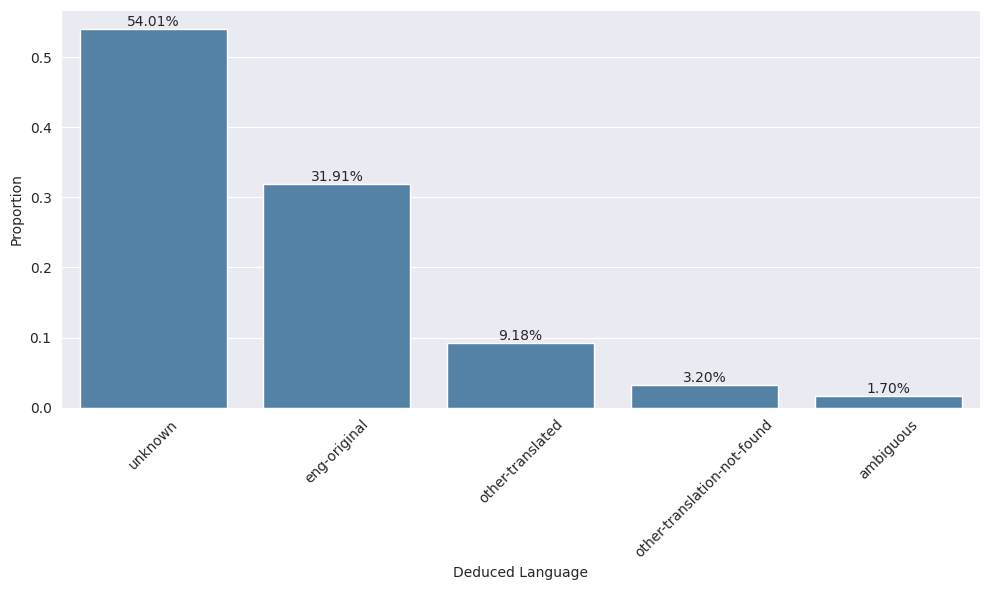

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate proportions
language_counts = df['deduced_language'].value_counts(normalize=True)  # normalize=True gives proportions

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=language_counts.index, y=language_counts.values, color='steelblue')

plt.xlabel('Deduced Language')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

# Add proportion values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2%}',  # Convert to percentage format
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 5),  # Offset from the bar
        textcoords='offset points',
    )

plt.tight_layout()

In [5]:
genres_df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/goodreads/gr-book-genres.parquet',
    engine='pyarrow')  # or engine='fastparquet'
genres_df

book_id  genre_id  count
0         5333265         1      1
1         1333909         2    219
2         1333909         1      5
3         7327624         2      8
4         7327624         3      1
...           ...       ...    ...
5042537   2342551         9      1
5042538  22017381         5      2
5042539  22017381         6     13
5042540  11419866         2      4
5042541  11419866         6     19

[5042542 rows x 3 columns]

In [6]:
book_id_df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/goodreads/gr-book-ids.parquet',
    engine='pyarrow')  # or engine='fastparquet'
book_id_df =  book_id_df[['book_id', 'work_id']]
book_id_df = book_id_df.dropna(subset=['work_id'])
book_id_df['work_id'] = book_id_df['work_id'].astype(int)
book_id_df = book_id_df.drop_duplicates()
book_id_df

book_id   work_id
0         5333265   5400751
1         1333909   1323437
2         7327624   8948723
3         6066819   6243154
4          287140    278577
...           ...       ...
2360650   3084038   3115103
2360651  26168430  46130263
2360652   2342551   2349247
2360653  22017381  41332799
2360654  11419866   2206102

[2360131 rows x 2 columns]

In [7]:
book_id_genre_df = pd.merge(genres_df, book_id_df, on='book_id')
book_id_genre_df = book_id_genre_df[['work_id', 'count', 'genre_id']]

book_id_genre_df = book_id_genre_df.groupby(['work_id', 'genre_id'], as_index=False)['count'].sum()
book_id_genre_df = book_id_genre_df.loc[book_id_genre_df.groupby('work_id')['count'].idxmax()]
book_id_genre_df = book_id_genre_df.reset_index(drop=True)

print(book_id_genre_df)

          work_id  genre_id  count
0              40         7    272
1              62         2    648
2              81         8     48
3              84         8    846
4              87         2   5580
...           ...       ...    ...
1125877  58369092         4     12
1125878  58369899         4     42
1125879  58370103         5      6
1125880  58374571        10     36
1125881  58377018         9      3

[1125882 rows x 3 columns]


In [8]:
work_genre_lang = book_id_genre_df.merge(df, on='work_id', how='left')
work_genre_lang

work_id  genre_id  count  deduced_language
0              40         7    272         ambiguous
1              62         2    648  other-translated
2              81         8     48      eng-original
3              84         8    846         ambiguous
4              87         2   5580         ambiguous
...           ...       ...    ...               ...
1125877  58369092         4     12           unknown
1125878  58369899         4     42      eng-original
1125879  58370103         5      6           unknown
1125880  58374571        10     36  other-translated
1125881  58377018         9      3           unknown

[1125882 rows x 4 columns]

In [9]:
genre_categories_df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/goodreads/gr-genres.parquet',
    engine='pyarrow')  # or engine='fastparquet'
genre_categories_df

genre_id                                   genre
0         1  history, historical fiction, biography
1         2                                 fiction
2         3                                  poetry
3         4                     fantasy, paranormal
4         5                mystery, thriller, crime
5         6                                 romance
6         7                             non-fiction
7         8                                children
8         9                             young-adult
9        10                         comics, graphic

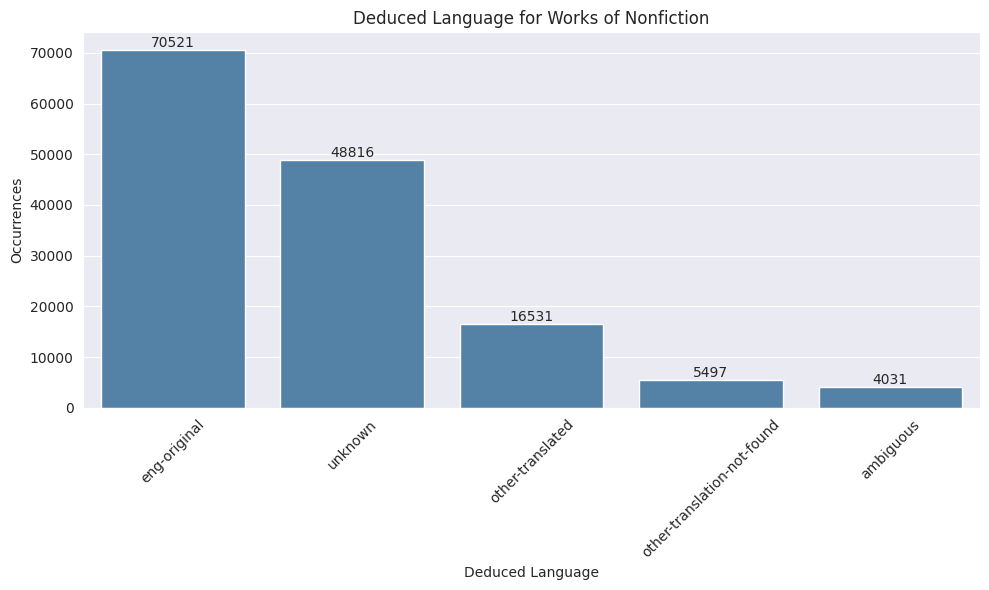

In [9]:
df_nonfiction = work_genre_lang[work_genre_lang['genre_id'] == 1]
import seaborn as sns
import matplotlib.pyplot as plt
language_counts = df_nonfiction['deduced_language'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=language_counts.index, y=language_counts.values, color='steelblue')

plt.xlabel('Deduced Language')
plt.ylabel('Occurrences')
plt.title('Deduced Language for Works of Nonfiction')

plt.xticks(rotation=45)
# Add the count values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Text to display (the count)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 5),  # Offset from the bar
        textcoords='offset points',
    )

plt.tight_layout()
plt.show()

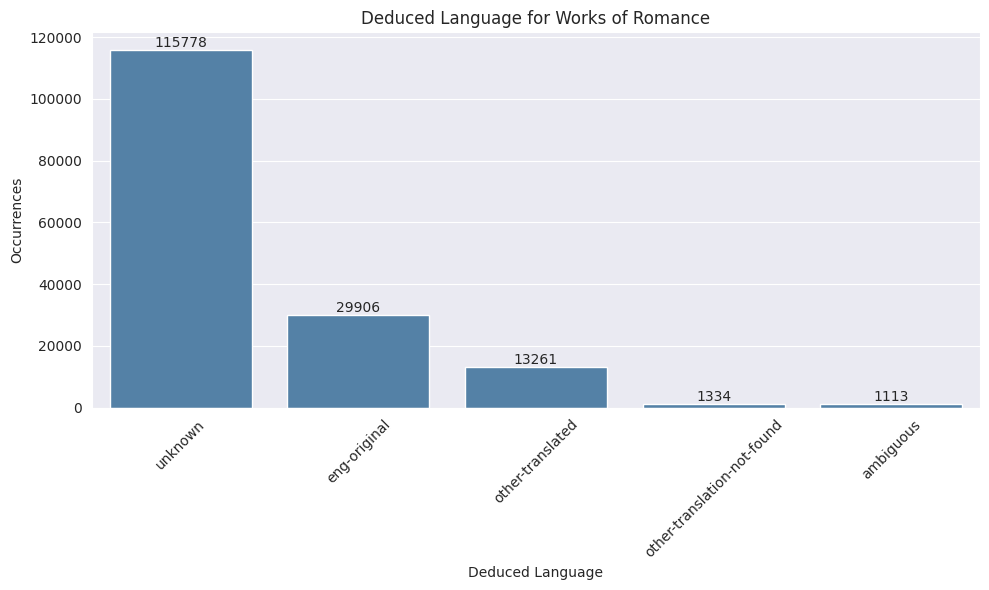

In [10]:
df_romance = work_genre_lang[work_genre_lang['genre_id'] == 6]
import seaborn as sns
import matplotlib.pyplot as plt
language_counts = df_romance['deduced_language'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=language_counts.index, y=language_counts.values, color='steelblue')

plt.xlabel('Deduced Language')
plt.ylabel('Occurrences')
plt.title('Deduced Language for Works of Romance')

plt.xticks(rotation=45)
# Add the count values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Text to display (the count)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 5),  # Offset from the bar
        textcoords='offset points',
    )

plt.tight_layout()
plt.show()

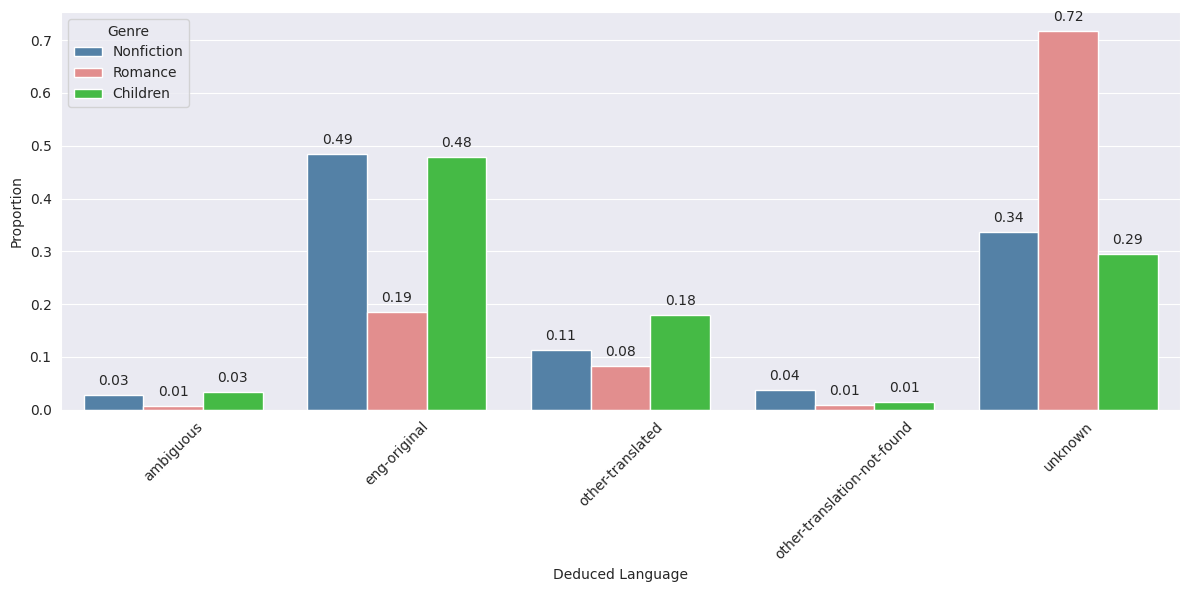

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_nonfiction = work_genre_lang[work_genre_lang['genre_id'] == 1]
df_romance = work_genre_lang[work_genre_lang['genre_id'] == 6]
df_children = work_genre_lang[work_genre_lang['genre_id'] == 8]

lang_counts_nonfiction = df_nonfiction['deduced_language'].value_counts(normalize=True)
lang_counts_romance = df_romance['deduced_language'].value_counts(normalize=True)
lang_counts_children = df_children['deduced_language'].value_counts(normalize=True)

ratio_df = pd.DataFrame({
    'Nonfiction': lang_counts_nonfiction,
    'Romance': lang_counts_romance,
    'Children': lang_counts_children,
}).fillna(0)

# Convert to long format for Seaborn
ratio_df = ratio_df.reset_index().melt(id_vars='deduced_language', var_name='Genre', value_name='Ratio')
ratio_df.rename(columns={'deduced_language': 'Language'}, inplace=True)#
# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ratio_df, x='Language', y='Ratio', hue='Genre', palette=['steelblue', 'lightcoral', 'limegreen'])

plt.xlabel('Deduced Language')
plt.ylabel('Proportion')
# plt.title('Language Distribution in Nonfiction, Romance and Children')

plt.xticks(rotation=45)

# Show values on top of bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            f'{p.get_height():.2f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom',
            xytext=(0, 5), textcoords='offset points'
        )

plt.tight_layout()
plt.show()

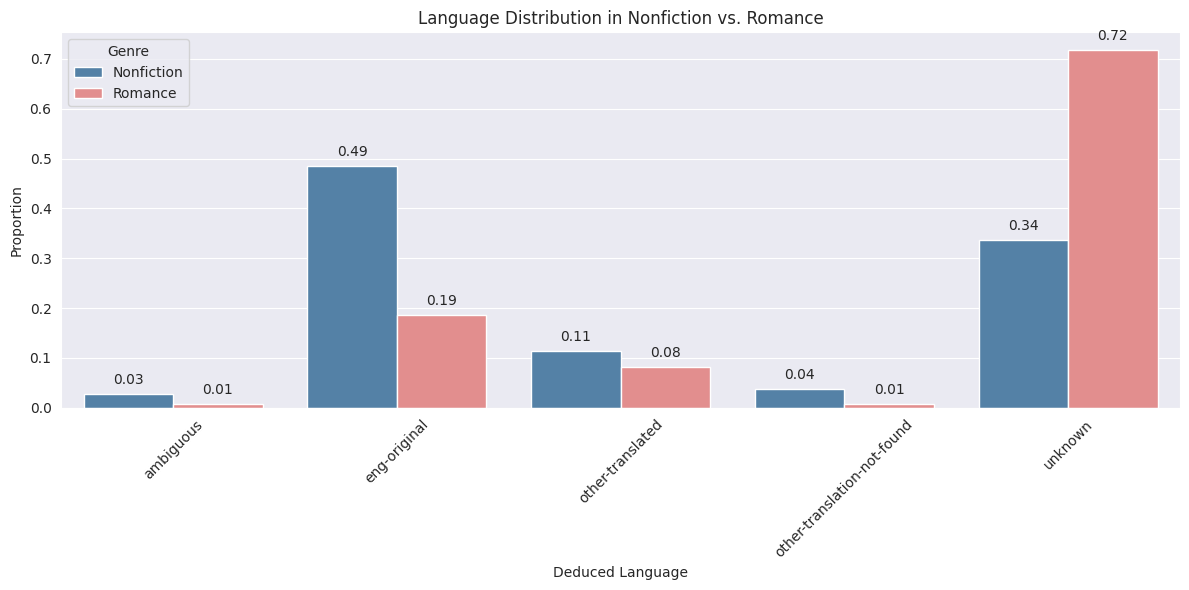

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_nonfiction = work_genre_lang[work_genre_lang['genre_id'] == 1]
df_romance = work_genre_lang[work_genre_lang['genre_id'] == 6]
df_children = work_genre_lang[work_genre_lang['genre_id'] == 8]

lang_counts_nonfiction = df_nonfiction['deduced_language'].value_counts(normalize=True)
lang_counts_romance = df_romance['deduced_language'].value_counts(normalize=True)
lang_counts_children = df_children['deduced_language'].value_counts(normalize=True)

ratio_df = pd.DataFrame({
    'Nonfiction': lang_counts_nonfiction,
    'Romance': lang_counts_romance,
}).fillna(0)

# Convert to long format for Seaborn
ratio_df = ratio_df.reset_index().melt(id_vars='deduced_language', var_name='Genre', value_name='Ratio')
ratio_df.rename(columns={'deduced_language': 'Language'}, inplace=True)#
# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ratio_df, x='Language', y='Ratio', hue='Genre', palette=['steelblue', 'lightcoral'])

plt.xlabel('Deduced Language')
plt.ylabel('Proportion')
plt.title('Language Distribution in Nonfiction vs. Romance')

plt.xticks(rotation=45)

# Show values on top of bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            f'{p.get_height():.2f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom',
            xytext=(0, 5), textcoords='offset points'
        )

plt.tight_layout()
plt.show()